This notebook has models to make predictions based on customer's 

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from fbprophet import Prophet
from datetime import datetime
from sklearn import preprocessing
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold,GridSearchCV
from sklearn.metrics import r2_score
from sklearn import preprocessing
from mlxtend.regressor import StackingRegressor
%matplotlib inline 

Has the past amount the customer transacted

In [2]:
df = pd.read_csv("deposit_new.csv")

Drop repeated column

In [3]:
df = df.drop(df.columns[0],axis=1)

Create the features matrix 

In [4]:
#we do not need time column to train
X = df.drop(columns = ['amount','time']).values

Create target values matrix

In [5]:
y = df.amount.values

Create k folds for cross validation

In [6]:
kf = KFold(n_splits=10) #10 is my preference (not based on any convention)

### Linear Regression

Train the dataset and print r2 score

In [7]:
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    reg = LinearRegression().fit(X_train, y_train)
    y_ = reg.predict(X_test)
    y_pred = reg.predict(X_train)
    print(r2_score(y_train, y_pred),'\t\t\t',r2_score(y_test, y_))
    

0.610285069946 			 0.502808958477
0.595028830774 			 0.664846204087
0.609952144117 			 0.525264308485
0.607700317379 			 0.544920745108
0.601595366648 			 0.598234243458
0.597510894497 			 0.629251710346
0.608952104114 			 0.520206138186
0.591679586289 			 0.685001156767
0.599835396991 			 0.616960964315
0.589860653922 			 0.683298441197


Not too shabby but still not good enough to consider. Looking for a root square mean tending towards 90% +

### Decision Tree

In [8]:
from sklearn import tree

In [9]:
for train_index, test_index in kf.split(X):
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    #best hyperparameters at the time 
    clf = tree.DecisionTreeRegressor(max_depth=1, min_samples_split=2,random_state=0,max_features=5)
    clf.fit(X_train, y_train) 
    
    y_ = clf.predict(X_test)
    y_pred = clf.predict(X_train)
    print(r2_score(y_train, y_pred),'\t\t\t',r2_score(y_test, y_))


0.30280840428 			 0.289913320564
0.297742787533 			 0.343253495006
0.298956386446 			 0.323874420835
0.29930723871 			 0.323116040059
0.311688724046 			 0.225927245105
0.300387784554 			 0.312636540564
0.300095630306 			 0.319036614335
0.300017436266 			 0.31316169721
0.304771350268 			 0.260580969794
0.302897221437 			 0.293128744855


### Random Forest Regressor

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    #best hyperparameters at the time 
    clf = RandomForestRegressor(max_depth=5, random_state=5,
                                 n_estimators=20)
    clf.fit(X_train, y_train) 
    
    y_ = clf.predict(X_test)
    y_pred = clf.predict(X_train)
    print(r2_score(y_train, y_pred),'\t\t\t',r2_score(y_test, y_))

0.654898989631 			 0.492394904029
0.64248540832 			 0.641822188005
0.648293701977 			 0.55734631037
0.652406650363 			 0.536944446287
0.646632523058 			 0.604634400062
0.645242968908 			 0.590519860981
0.650184931676 			 0.514316474386
0.638116963356 			 0.667788527221
0.643051402346 			 0.620012606715
0.633989782092 			 0.678241173808


### KNN Regressor

In [11]:
from sklearn.neighbors import KNeighborsRegressor

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    #best hyperparameters at the time 
    neigh = KNeighborsRegressor(n_neighbors=30)
    neigh.fit(X_train, y_train) 
    
    y_ = neigh.predict(X_test)
    y_pred = neigh.predict(X_train)
    print(r2_score(y_train, y_pred),'\t\t\t',r2_score(y_test, y_))

0.608749146136 			 0.521164192113
0.599200317863 			 0.643730610442
0.61240055427 			 0.547533066652
0.610845376389 			 0.552067754802
0.610291806896 			 0.520147275618
0.601538394533 			 0.615551818065
0.611529361041 			 0.511910262871
0.598476128537 			 0.626410486913
0.604737095669 			 0.561042206427
0.595925881404 			 0.646611259035


### Stack Regressor

In [12]:
lr = LinearRegression()
rfr = RandomForestRegressor(max_depth=5, random_state=5,n_estimators=20)
dtr = tree.DecisionTreeRegressor(max_depth=1, min_samples_split=2,max_features=5)
neigh = KNeighborsRegressor(n_neighbors=30)
stregr = StackingRegressor(regressors=[rfr, lr, neigh], 
                           meta_regressor=neigh)

# Training the stacking classifier
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]       
    stregr.fit(X_train, y_train) 
    
    y_ = stregr.predict(X_test)
    y_pred = stregr.predict(X_train)
    print(r2_score(y_train, y_pred),'\t\t\t',r2_score(y_test, y_))



0.654005564396 			 0.516756315441
0.641089828205 			 0.634129571542
0.645941622717 			 0.543215130741
0.644713630949 			 0.543534776254
0.648963827377 			 0.523310767593
0.639306612087 			 0.595324949377
0.647053445803 			 0.510943713352
0.638449225008 			 0.631232649911
0.640397448425 			 0.568552009638
0.633081008455 			 0.649051791638


Create dataframe to ease plotting to compare predicted and actual

In [13]:
#Just get last test fold
test_df = df.iloc[test_index]

In [14]:
test_df['predictions'] = y_

Extract only time,amount and predictions (ignore past amount and such)

In [15]:
test_df = test_df[['time','amount','predictions']].set_index('time')

Show how model predictions compare with actual values

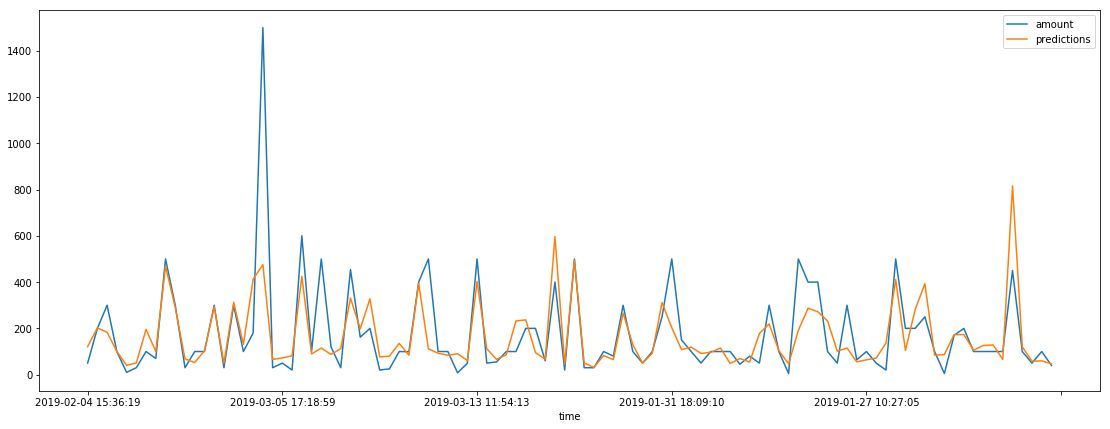

In [16]:
plt.rcParams['figure.figsize']=[19,7]
test_df.head(100).plot()

## Anomaly Detection based on period between transactions of each account

Based on the fact that some accounts were seen transacting about 10 times within the same hour

Get the dataset

In [17]:
successfulVends_raw = pd.read_csv("successfulVENDS2019.csv")
deposit_raw = pd.read_csv("deposit2019.csv")
loan_raw = pd.read_csv("loan2019.csv")

Just renaming for uniformity in names

In [18]:
deposit_raw= deposit_raw.rename(index=str,columns={"transamount":"amount","systemtranstime":"time"})
deposit_raw['time'] = pd.to_datetime(deposit_raw.time)

Only get the timestamps, amounts and account numbers

In [19]:
deposit= deposit_raw[['billrefnumber','time','amount']]
#group by accounts 
deposit = deposit.groupby(['billrefnumber','time']).sum()

Groupby returns two indexes; Time is treated as one of them and cannot be used as a column hence reset

In [20]:
deposit['time'] = deposit.reset_index(level=1).time.values

Get the timedelta (difference) between last transaction of that account
Get the median amount of that account

In [21]:
delta = []
median_amount = []
for idx in deposit.index.levels[0]:
    
    delta.append( deposit.ix[idx].time.diff())
    median_amount.append(np.median(deposit.ix[idx].amount.values))
  

Get time delta as numeric and add to dataframe

In [22]:
from datetime import timedelta

In [23]:
d = [item/timedelta(days=1) for delt in delta for item in delt]

In [24]:
deposit['delta']=d


Get the median timedelta

In [25]:
median_delta = []
dep = deposit.dropna(axis=0)
for idx in dep.index.levels[0]:
    
    
    median_delta.append(np.median(dep.ix[idx].delta.values))

Create dataframe to plot easily

In [26]:
d = {'billrefnumber':deposit.index.levels[0] , 'median_delta': median_delta,'median_amount':median_amount}
depo = pd.DataFrame(data=d).dropna()

Visualize medians of time deltas and amount of each account

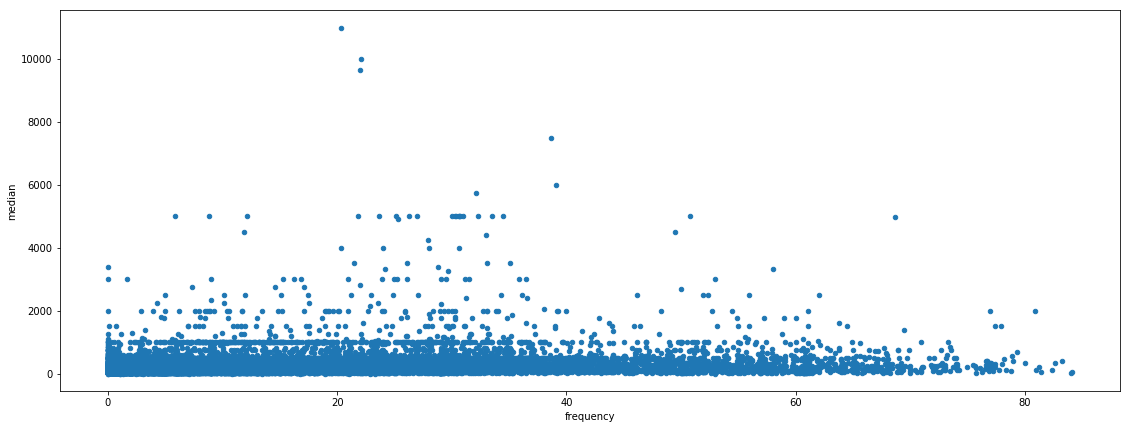

In [27]:
depo.drop(columns='billrefnumber').plot(x='frequency',y='median',kind='scatter')

Get dataset

In [28]:
deposit_raw = pd.read_csv("deposit2019.csv")

Rename columns for uniformity

In [29]:
deposit_raw= deposit_raw.rename(index=str,columns={"transamount":"amount","systemtranstime":"time"})

Extract account number,timestamp and amount

In [30]:
deposit = deposit_raw[["billrefnumber","time","amount"]]

Convert to datetime type

In [31]:
deposit['time']=pd.to_datetime(deposit.time)

Group by account numbers

In [32]:
deposit = deposit.groupby(['billrefnumber','time']).sum()

Reset index to have time as a column since group by sets it as an index

In [33]:
deposit['time'] = deposit.reset_index(level=1).time.values

Get the time deltas

In [34]:
delta = []

for idx in deposit.index.levels[0]:
    
    delta.append( deposit.ix[idx].time.diff())

Get delta as a numeric

In [35]:
from datetime import timedelta

d = [item/timedelta(days=1) for delt in delta for item in delt]

deposit['delta']=d

Repeat groupby to dropna() (I dont understand why it doesnt drop properly)

In [36]:
deposit.dropna(how='any',inplace=True)
deposit = deposit.groupby(['billrefnumber','time']).sum()
deposit['time'] = deposit.reset_index(level=1).time.values

Trying to check if we can get anomalies based on time deltas; using mean,minimum and maximum as features

Extract those features

In [37]:
median = []
minimum = []
maximum = []


for idx in deposit.index.levels[0]:
    
    minimum.append( deposit.ix[idx].delta.min())
    maximum.append( deposit.ix[idx].delta.max())
    median.append( deposit.ix[idx].delta.mean())

Create dataframe for those features with account numbers as index

In [38]:
deposit_central = pd.DataFrame(index= deposit.index.levels[0],data={'median':median,'maximum':maximum,'minimum':minimum})

Get matrix of those features

In [39]:
X = deposit_central.values

Get clusters based on the features using K-Means

In [40]:
from sklearn.cluster import KMeans

First identify suitable number of clusters using elbow method

In [41]:
#Get the errors for up to 7 clusters (no reason for 7 specifically)
Sum_of_squared_distances = []
K = range(1,7)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

Visualize to get the right elbow point so as to get appropriate number of clusters

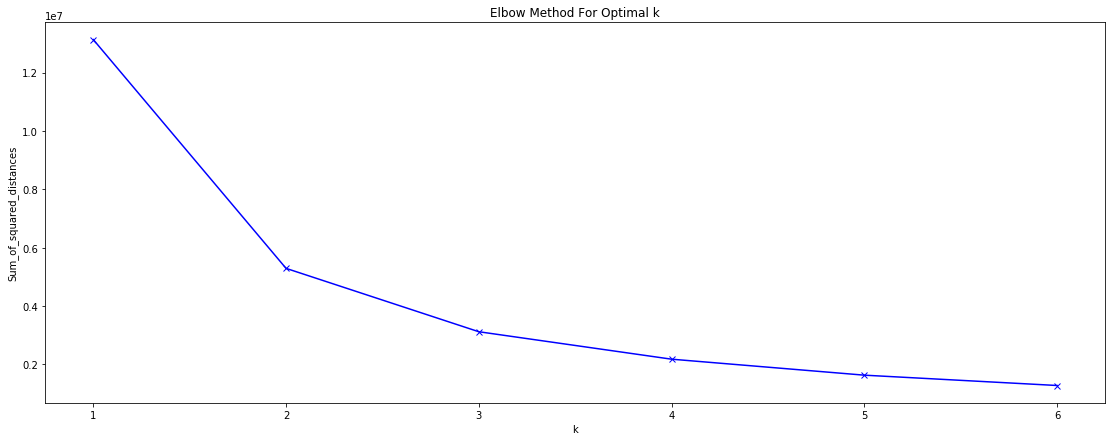

In [42]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Get 3d plot modules

In [43]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D

Scatter plot for the features 

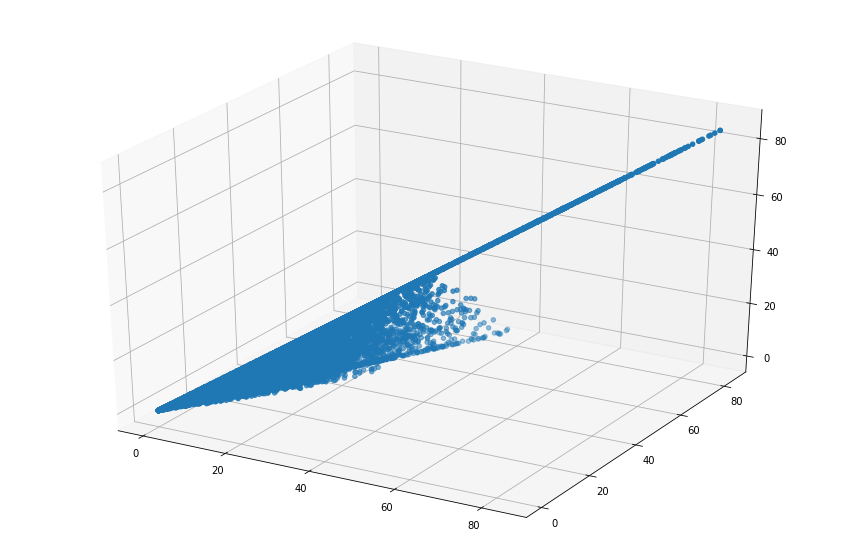

In [44]:
plt.rcParams['figure.figsize']=[15,10]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(deposit_central['median'].values, deposit_central.maximum.values, deposit_central.minimum.values)


Use scatter plot for two features

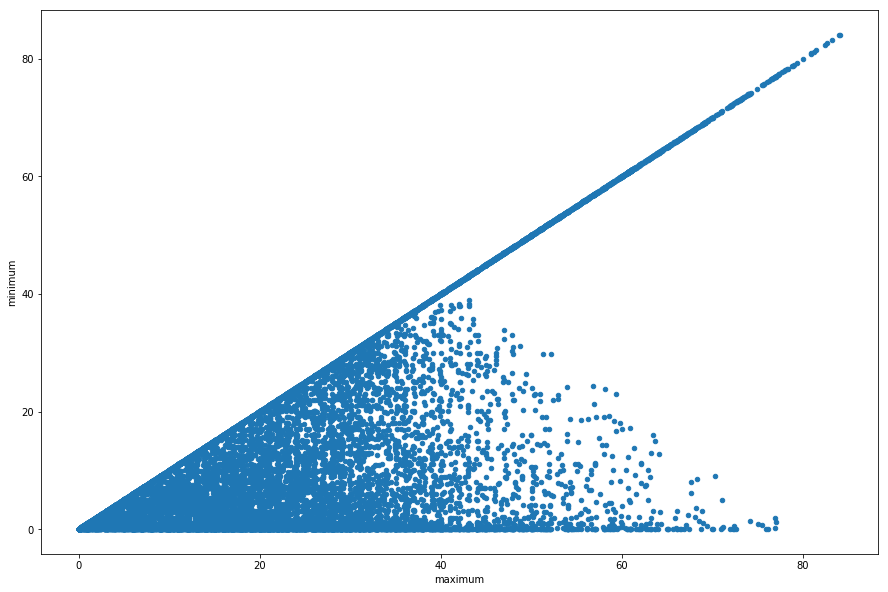

In [45]:
deposit_central.plot(kind='scatter',x='maximum',y='minimum')